# なんでも小さく見える画像の合成

ライブラリのインポート

In [13]:
import os
import platform
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys

In [14]:
use_os = platform.system()

if(use_os == "Windows"):
    dir_connect = "\\"
else:
    dir_connect = "/"

ファイルの読み込み

### 入力が必要

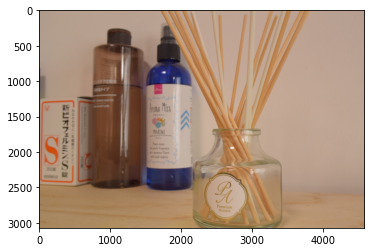

In [15]:
parent_dir = os.getcwd()
# 画像名を入力
pre_image_name = "sample2.jpg"
pre_image_dir = parent_dir + dir_connect + "pre_image" + dir_connect + pre_image_name

if(os.path.exists(pre_image_dir)):
   pre_array_obj = plt.imread(pre_image_dir)
   plt.imshow(pre_array_obj)

else:
   print("画像が存在しません．")
   sys.exit()

尺度の色を選ぶ，画像のサイズを調べる

### 入力が必要

画像のサイズ：(3072, 4592)
尺度画像のサイズ：(720, 1280)


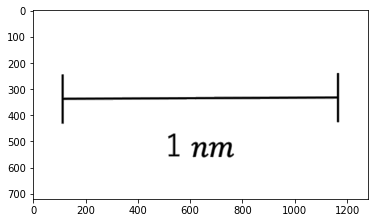

In [16]:
# 黒色なら"b", 白色なら"h"を入力
scale_color = "b"

if(scale_color == "h"):
    scale_image_name = "scale1.jpeg"
elif(scale_color == "b"):
    scale_image_name = "scale2.jpeg"

scale_dir = parent_dir + dir_connect + "scale_image" + dir_connect + scale_image_name


img1 = cv2.imread(pre_image_dir)
img2 = cv2.imread(scale_dir)

img_high, img_width = img1.shape[:2]
scale_high, scale_width = img2.shape[:2]

print("画像のサイズ：({}, {})".format(img_high, img_width))
print("尺度画像のサイズ：({}, {})".format(scale_high, scale_width))


pre_array_obj2 = plt.imread(scale_dir)
plt.imshow(pre_array_obj2)

尺度画像のリサイズ，出力先の作成

In [17]:
after_scale_high = img_high//4
after_scale_width = (after_scale_high*scale_width)//scale_high

pre_img3 = cv2.imread(scale_dir) 
img3 = cv2.resize(pre_img3, (after_scale_width, after_scale_high))

after_image_dir = parent_dir + dir_connect + "after_image" + dir_connect + "af_" +pre_image_name

画像の合成

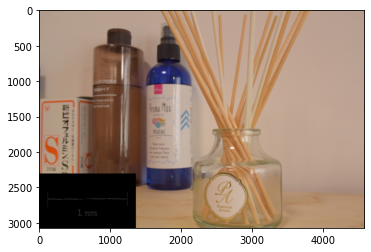

In [18]:
after_image = img1
after_image_dir = parent_dir + dir_connect + "after_image" + dir_connect + "af_" +pre_image_name

y_offset = img_high - after_scale_high
x_offset = img_width - after_scale_width

after_image[y_offset : y_offset + after_scale_high, 0 : after_scale_width] = img3
cv2.imwrite(after_image_dir, after_image)
pre_array_obj3 = plt.imread(after_image_dir)
plt.imshow(pre_array_obj3)

In [ ]:
def delate_back(image_dir):
    if os.path.exists(image_dir):
        # 背景削除
        img = cv2.imread(image_dir)
        b = img[:, :, 0]
        g = img[:, :, 1]
        r = img[:, :, 2]
        # a = img[:, :, 3]

        cv2.imshow("img", img)
        cv2.imshow("b", b)
        cv2.imshow("g", g)
        cv2.imshow("r", r)
        # cv2.imshow("a", a)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        # return after_image
    else:
        print("画像が存在しません．")
        sys.exit()
        
delate_back(scale_dir)